## My project on "Hand on ML with Keras Tensorflow and Sci-kit learn By Aurelien" 
### End-to-End Machine Learning Project🧊🧊🧊🧊🧊

In [60]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [61]:
def load_housing_data(housing_path='./datasets/housing/'):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing_df = load_housing_data()

In [62]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


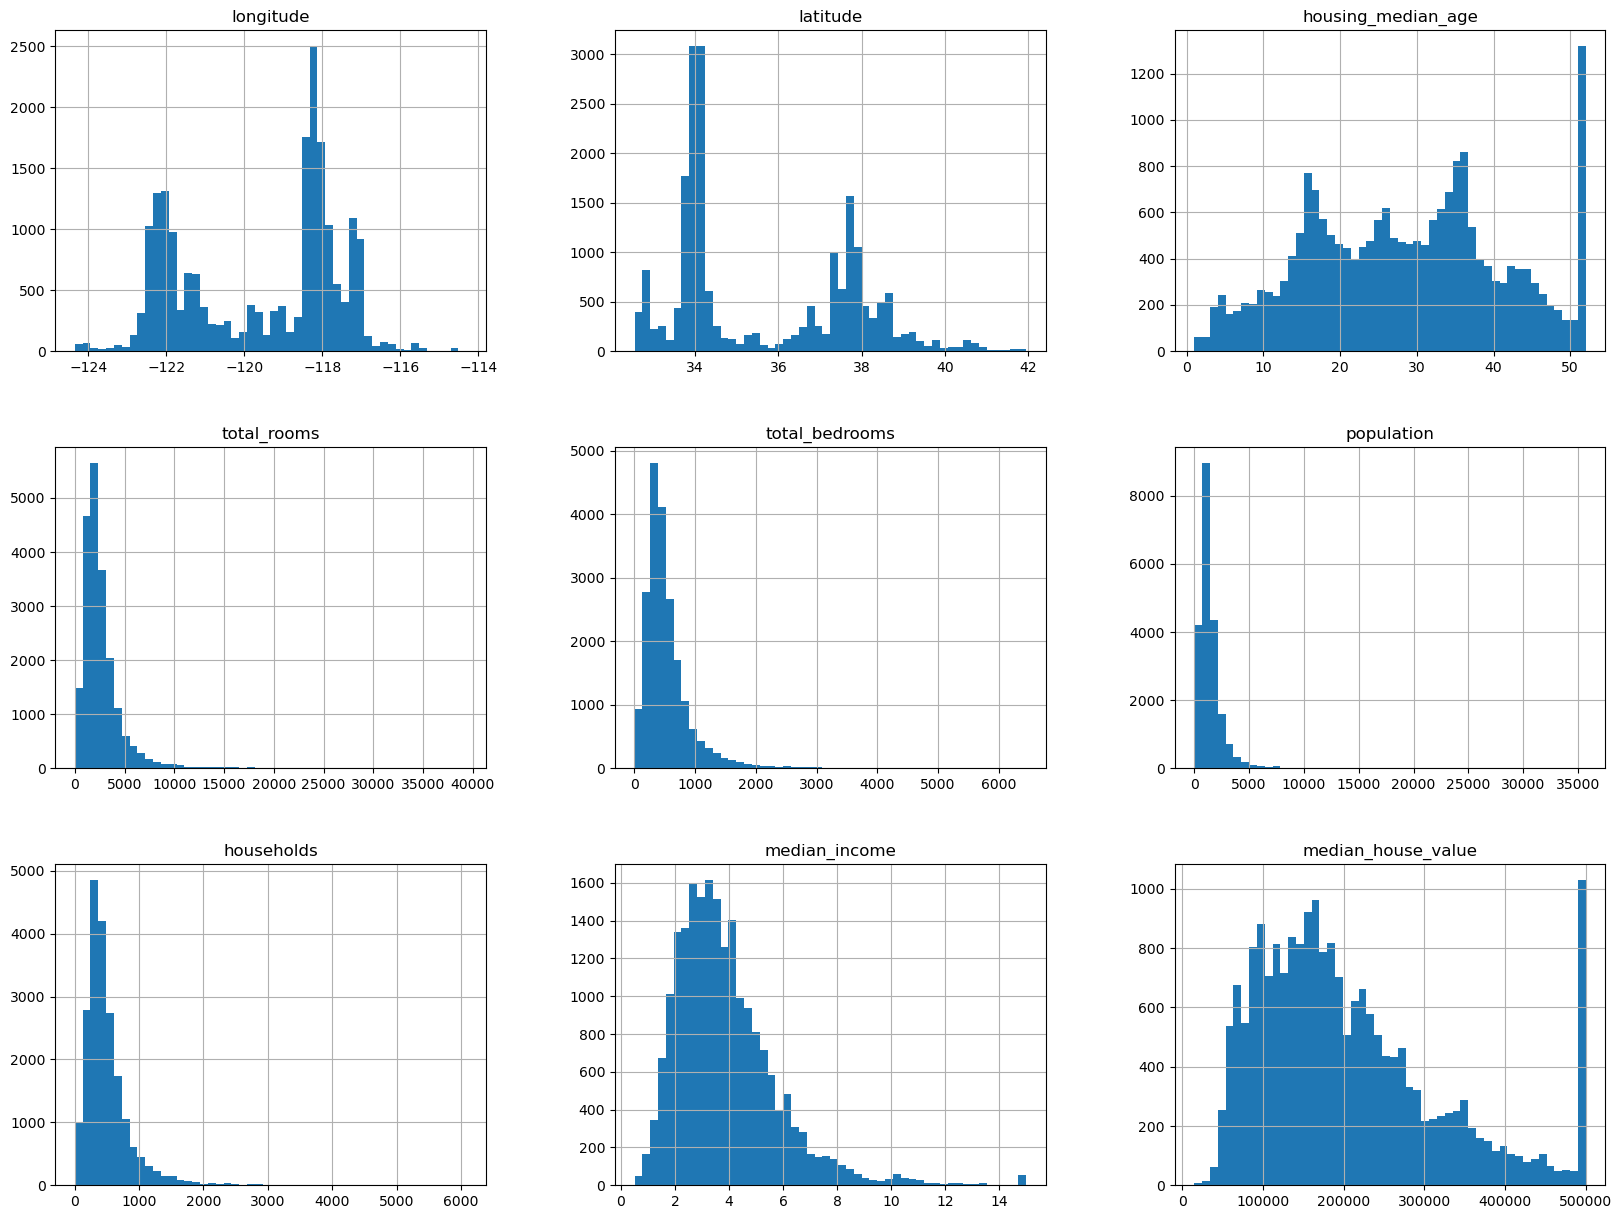

In [63]:
housing_df.hist(bins=50, figsize=(20, 15))
plt.show()

###### This md note is just for you to see how `np.random.permutation()` works:
*** 
It basically takes in an integer and gives a randomly arranged set of numbers which starts from zero up until the integer that number specified 
***
```
randstuff = np.random.permutation(10)
print(randstuff)
Output: array([9, 4, 1, 7, 8, 5, 0, 6, 2, 3])
```

- Let's seperate our training set from our test set!!

In [64]:
def train_test_split(data, test_ratio):
    shuffled_indexes = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_set_indexes = shuffled_indexes[:test_size]
    train_set_indexes = shuffled_indexes[test_size:]
    return [data.iloc[train_set_indexes], data.iloc[test_set_indexes]]
    print('''
        Usage: train_set, test_set = split_train_test(data, test_ratio)
        data: A pandas dataframe....
        test_ratio: Should be in the range of [0 - 1]
    ''')

```
Well, the function above works well but there's still a problem here.
if we run the program again, we will get a different test set and overtime, your ML algorithm will see the whole dataset which is what me and you know you want to avoid 😎😎😎.
One solution is to save the testset on the firat run, and load it subsequently. Another option is to set the random number generator's seed (e.g np.random.seed(42)) before calling np.random.permutation(), so that it always generates the same shuffled indexes.
bUt the issue is, both soluutions above will fail if we fetch an updated dataset!!

A common solution is to use each instance's identifier to decide whether or not it should go
in the test set (assuming instances have a unique and immutable identifier). For
example, you could compute a hash of each instance's identifier and put that instance
in the test set if the hash is lower or equal to 20% of the maximum hash value. This
ensures that the test set will remain consistent across multiple runs, even if you
refresh the dataset. The new test set will contain 20% of the new instances, but it will
not contain any instance that was previously in the training set. Here is how it is implemented
```

In [65]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column_name):
    ids = data[id_column_name]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return [data.loc[~in_test_set], data.loc[in_test_set]]
    

In [66]:
housing_with_id = housing_df.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

```
If you use the row index as a unique identifier, you need to make sure that new data
gets appended to the end of the dataset, and no row ever gets deleted. If this is not
possible, then you can try to use the most stable features to build a unique identifier.
For example, a district’s latitude and longitude are guaranteed to be stable for a few
million years, so you could combine them into an ID like so:
```

***
`housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]`
`train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")`
***

```
Scikit-Learn provides a few functions to split datasets into multiple subsets in various
ways. The simplest function is train_test_split, which does pretty much the same
thing as the function split_train_test defined earlier, with a couple of additional
features. First there is a random_state parameter that allows you to set the random
generator seed as explained previously, and second you can pass it multiple datasets
with an identical number of rows, and it will split them on the same indices (this is
very useful, for example, if you have a separate DataFrame for labels):
```

In [67]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=42)


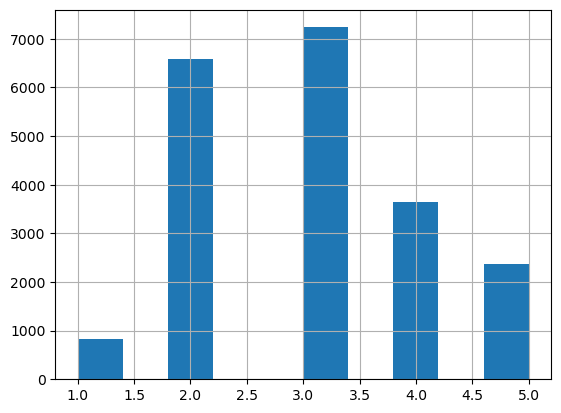

<Figure size 100x200 with 0 Axes>

In [68]:
housing_df["income_categories"] = pd.cut(
    housing_df["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)
housing_df["income_categories"].hist()
plt.figure(figsize=(1, 2))
plt.tight_layout()
plt.show()

- Notice that a new column has been added to our dataframe 🧊🧊🧊🧊

In [69]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_categories
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


***
Now you are ready to do `stratified sampling` based on the income category. For this you can use Scikit-Learn's `StratifiedShuffleSplit` class:
***
- Stratisfied sampling is all about taking data from all strata(categories) into consideration while building an ML model

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

- Let's see what is inside `split.split(housing_df, housing_df["income_categories"])`

In [71]:
for x, y in split.split(housing_df, housing_df["income_categories"]):
    print(x)
    print(y)
    print(len(x))
    print(len(y))

[12655 15502  2908 ... 19263 19140 19773]
[ 5241 17352  3505 ... 17223 10786  3965]
16512
4128


In [72]:
for train_index, test_index in split.split(housing_df, housing_df["income_categories"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

***
```
Let’s see if this worked as expected. You can start by looking at the income category proportions in both the test and train sets.

Notice that the propotion of each category in the two sets are very similar(if not the same).
```
***

In [73]:
strat_test_set["income_categories"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_categories, dtype: float64

In [74]:
strat_train_set["income_categories"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_categories, dtype: float64

- Now that we have engineered our train and test dataframes using stratisfied sampling on our `median income` column, we can safely drop the `income_categories` column we created the other time!!!

In [75]:
for dataframe in [strat_test_set, strat_train_set]:
    dataframe.drop(["income_categories"], axis=1, inplace=True)

***
```
We spent quite a bit of time on test set generation for a good reason: this is an often
neglected but critical part of a Machine Learning project. Moreover, many of these
ideas will be useful later when we discuss cross-validation. Now it’s time to move on
to the next stage: exploring the data.

```
***

## Discover and Visualize the Data to Gain Insights

In [76]:
new_housing_df = strat_train_set.copy()
new_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


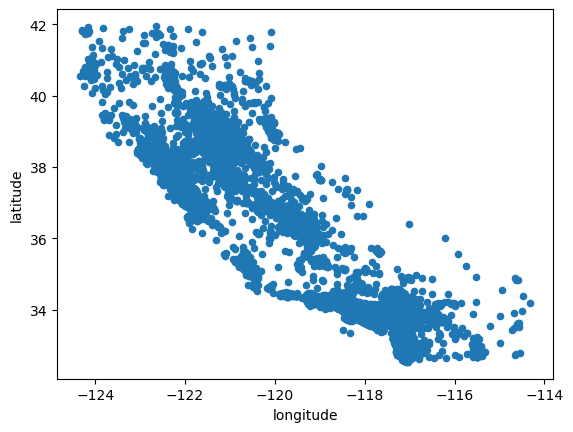

In [77]:
new_housing_df.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

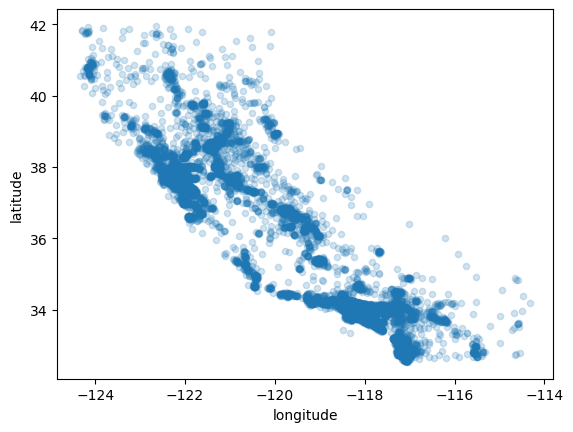

In [78]:
new_housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.show()

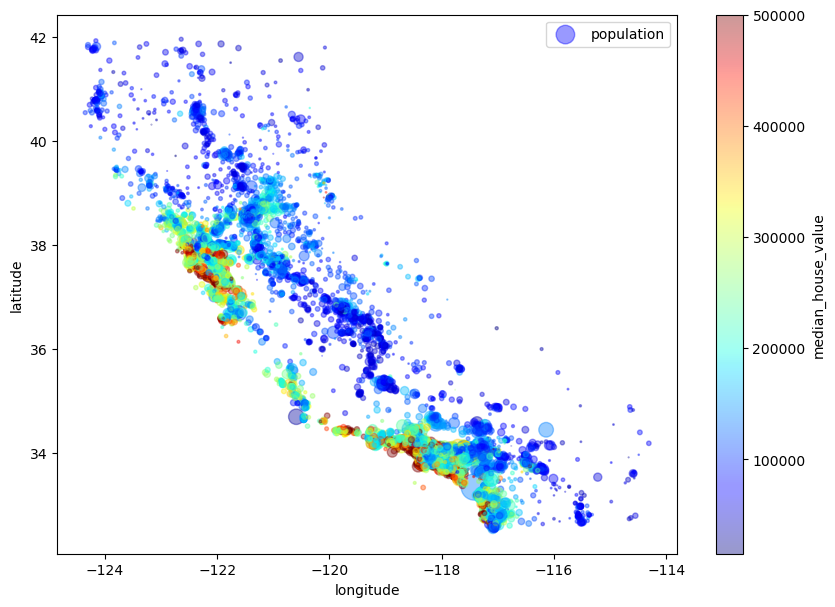

In [79]:
new_housing_df.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4, s=new_housing_df["population"]/100,
    label="population", figsize=(10, 7), c="median_house_value", cmap=plt.get_cmap("jet"), 
    colorbar=True
)
plt.show()

## Looking for Correlations
```
Since the dataset is not too large you can easily compute the standard correlation
coefficient (also called Pearson's r) between every pair of attributes using the corr()
method:
```

In [80]:
correlation = new_housing_df.corr(numeric_only=True)
correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

### Experimenting with Attribute Combinations
```
Hopefully the previous sections gave you an idea of a few ways you can explore the
data and gain insights. You identified a few data quirks that you may want to clean up
before feeding the data to a Machine Learning algorithm, and you found interesting
correlations between attributes, in particular with the target attribute. You also
noticed that some attributes have a tail-heavy distribution, so you may want to trans‐
form them (e.g., by computing their logarithm). Of course, your mileage will vary
considerably with each project, but the general ideas are similar.
One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations. For example, the
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at. Let’s create these new
attributes:
```

In [81]:
new_housing_df["rooms_per_household"] = new_housing_df["total_rooms"]/new_housing_df["households"]
new_housing_df["bedrooms_per_room"] = new_housing_df["total_bedrooms"]/new_housing_df["total_rooms"]
new_housing_df["population_per_household"]=new_housing_df["population"]/new_housing_df["households"]

In [82]:
correlation = new_housing_df.corr(numeric_only=True)
correlation["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

***
```
We can see that the columns we engineered has more correlation with the median_house_value than the actual column we engineered them from!! This means that we can actually add our enigneered columns into our dataframe if those columns have a reasonable correlation with our label, which is median_house_value in this case
```
***

## Prepare the Data for Machine Learning Algorithms
It's time to prepare the data for your Machine Learning algorithms. Instead of just
doing this manually, you should write functions to do that, for several good reasons:
- This will allow you to reproduce these transformations easily on any dataset (e.g.,
the next time you get a fresh dataset).
- You will gradually build a library of transformation functions that you can reuse
in future projects.
- You can use these functions in your live system to transform the new data before
feeding it to your algorithms.
- This will make it possible for you to easily try various transformations and see which combination of transformations works best.
```
But first let’s revert to a clean training set (by copying strat_train_set once again),
and let’s separate the predictors and the labels since we don’t necessarily want to apply
the same transformations to the predictors and the target values (note that drop()
creates a copy of the data and does not affect strat_train_set):
```

## Data Cleaning
Many datasets use to have some missing values and if not controlled well, it can negatively affect out model.

#### There are three common ways to solve this problem:
1. Get rid of the whole row that has a missing column in it. we do this using df.dropna([missing_column])
2. Get rid of a whole column. We do this 